<h1>GAN</h1>
<h6>Saket Tiwari</h6>
Date: 12 Jun 2019

In [1]:
#generator ->generates images
#discriminator -> detects fake image

In [3]:
!pip install tqdm

In [4]:
import os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
from keras.layers import Input, Conv2D, UpSampling2D, Dense, Dropout, Flatten, Reshape, LeakyReLU
from keras.models import Model, Sequential
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l1,l1_l2
from keras.datasets import mnist
from keras.optimizers import Adam
from keras import backend as K

In [11]:
K.set_image_dim_ordering('th')
#th : (depth, input, rows, cols)
#tf:  (rows, cols, input,depth)

np.random.seed(1000)

randomDim=100 #(100x100 ka random img)

In [12]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()
X_train = (X_train.astype(np.float32)-127.5)/127.5 #We are noramlising it in range(-1,1)
X_train= X_train.reshape(60000,784) #flatten 28x28 = 784

In [13]:
adam =Adam(lr=0.0002, beta_1=0.5)  #beta_1 :decay rate just like exploration rate in reinforcement

In [14]:
generator = Sequential()
generator.add(Dense(256,input_dim=randomDim))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784, activation='tanh'))
generator.compile(loss='binary_crossentropy', optimizer=adam)
generator.summary()

W0712 11:57:16.090866  7184 deprecation_wrapper.py:119] From c:\users\professionally_saket\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0712 11:57:16.093858  7184 deprecation_wrapper.py:119] From c:\users\professionally_saket\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0712 11:57:16.160860  7184 deprecation_wrapper.py:119] From c:\users\professionally_saket\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0712 11:57:16.250406  7184 deprecation_wrapper.py:119] From c:\users\professionally_saket\appdata\local\programs\python\python36\lib\site-packages\keras\optimizers.py:79

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 784)               803600    
Total para

In [15]:
discriminator=Sequential()
discriminator.add(Dense(1024,input_dim=784))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))

discriminator.add(Dense(512))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))

discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))

discriminator.add(Dense(1,activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer=adam)
discriminator.summary()

W0712 12:02:45.542415  7184 deprecation_wrapper.py:119] From c:\users\professionally_saket\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0712 12:02:45.553387  7184 deprecation.py:506] From c:\users\professionally_saket\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1024)              803840    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
__________

In [17]:
ganInput=Input(shape=(randomDim,))
x= generator(ganInput)
ganOutput=discriminator(x)
gan=Model(input=ganInput,output=ganOutput)
gan.compile(loss='binary_crossentropy',optimizer=adam)
gan.summary()

c:\users\professionally_saket\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("se...)`
  after removing the cwd from sys.path.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 784)               1486352   
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 1460225   
Total params: 2,946,577
Trainable params: 2,946,577
Non-trainable params: 0
_________________________________________________________________


In [23]:
def plotGeneratedImages(epochs,examples=100,dims=(10,10),figsize=(10,10)):
    
    noise=np.random.normal(0,1,size=[examples,randomDim])
    generatedImages=generator.predict(noise)
    generatedImages=generatedImages.reshape(examples,28,28)
    
    plt.figure(figsize=figsize)
    for i in range(generatedImages.shape[0]):
        plt.subplot(dims[0],dims[1],i+1)
        plt.imshow(generatedImages[i], interpolation='nearest',cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()

In [24]:
def train(epochs=1,batchsize=128):
    
    m=X_train.shape[0] #no of training examples
    batchCount=m // batchsize #ek epoch me kitne batches ko train krega
    plotGeneratedImages(0)
    for e in range(1,epochs+1):
        
        for _ in tqdm(range(batchCount)): #progress bar
            
            noise =np.random.normal(0,1,size=[batchsize , randomDim])  # 128 random img of dim =10x10 is generated
            generatedImages = generator.predict(noise) #fake image is generated
            
            imageBatch= X_train[np.random.randint(0,m,size=batchsize)] # image randomly selected 
            
            X= np.concatenate([imageBatch,generatedImages]) # actual images and fake images are concatenated
            yDis=np.zeros(2*batchsize)
            yDis[:batchsize] = 0.9 #One-sided label smoothing-> to remove overconfidence of discriminator
            
            discriminator.trainable=True
            dloss= discriminator.train_on_batch(X,yDis)
            
            discriminator.trainable=False
            noise =np.random.normal(0,1,size=[batchsize , randomDim]) 
            yGen = np.ones(batchsize)
            gloss= gan.train_on_batch(noise,yGen)
            
        if e%10==0:
            plotGeneratedImages(e)

  0%|                                                                                          | 0/468 [00:00<?, ?it/s]c:\users\professionally_saket\appdata\local\programs\python\python36\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
  8%|██████▏                                                                          | 36/468 [00:05<00:59,  7.23it/s]


KeyboardInterrupt: 

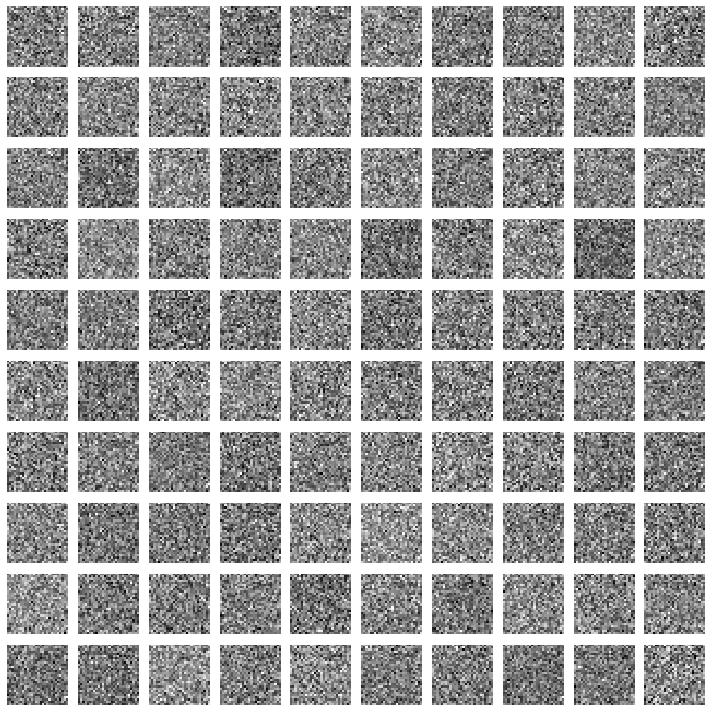

In [25]:
train(50)